# Multi-tower quantum many-body scars in the PXP model

In [1]:
from tqdm.notebook import tqdm
import qutip as qt
import numpy as np
from importlib import reload
import scipy.sparse
import scipy as scp

import qims as qims
from matplotlib import pyplot as plt


ImportError: cannot import name 'Pulse' from 'qims.Floquet.Drives' (/home/shemian29/Dropbox/CORE/qims/qims/Floquet/Drives.py)

In [ ]:
# print(st)
st = 67
# print(st)
# print()
j = Nx - 5 - 1
b = 1
print(b,j)
b <<= j  # compute a "mask" integer b which is 1 on site j and zero elsewhere
print(b)
st ^= b
print(st)


In [ ]:
print(qims.ind2state(3,Nx))
print(qims.ind2state(1,Nx))
b=1
print(qims.ind2state(b<<j,Nx))
b <<= j 
st=3
print(qims.ind2state(st ^ b,Nx))

In [ ]:
print(qims.ind2state(3,Nx))
print(qims.occ(3,5,Nx))

In [ ]:
[print(qims.ind2state(r,Nx)) for r in range(10)]

## Setup of PXP model

In [ ]:
#System size
Nx = 12
eta = 0.636
print("-> Basis for full system")
bs, bs_ind = qims.basis(Nx, parallel = False)
print()

print("-> Generate PXP operators")
Sx, Sy, Sz, S2 = qims.pxp_operators(bs,bs_ind,Nx)
h = qims.pxp_hamiltonian(bs,bs_ind,Nx)

print((Sx-h/2).norm())

## Use of translational invariance

In [ ]:
print("-> Generate momentum-space Hamiltonians and basis transformation")
Hs, U = qims.Hk(hamiltonian = Sx, 
            basis = bs, 
            basis_ind = bs_ind, 
            size = Nx,
            check_spect=True,
            check_symm=True)
print()

print("-> Calculate momentum eigenspectrum")
evals, evecs = qims.MomentumEigensystem(Hs, U, Nx)
print()


### Plot entanglement entropy

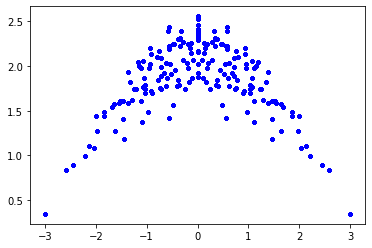

In [7]:
for k in k_list:
    for n in range(Hs[k].shape[0]): 
        plt.plot([evals[k,n]*0.826383 for n in range(Hs[k].shape[0])],\
                 [np.array(S[k,n,int(Nx/2)]) for n in range(Hs[k].shape[0])],'b.');

## Dynamics

### Operators

In [12]:
SZ = qims.sz_neel(size = Nx, basis = bs)

In [13]:
def psi_t(t, psi_0, evecs, evals, Hs):
    
    sm = 0
    for k in k_list:
        for n in range(Hs[k].shape[0]):
            sm = sm + np.exp(-1j*evals[k,n]*t)*(evecs[k,n]*psi_0.dag())*evecs[k,n]
    return sm
    

In [234]:
t_list = np.linspace(0,10,100)
scan = []
for t in tqdm(tlist):
    st = psi_t(t,qt.basis(len(bs),len(bs)-1), evecs,evals,Hs)
    scan.append(np.real((st.dag()*Sz*st).full()[0,0]))

  0%|          | 0/101 [00:00<?, ?it/s]

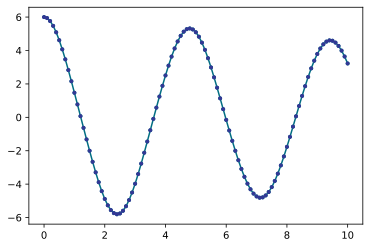

In [237]:
plt.plot(tlist,scan,'.')